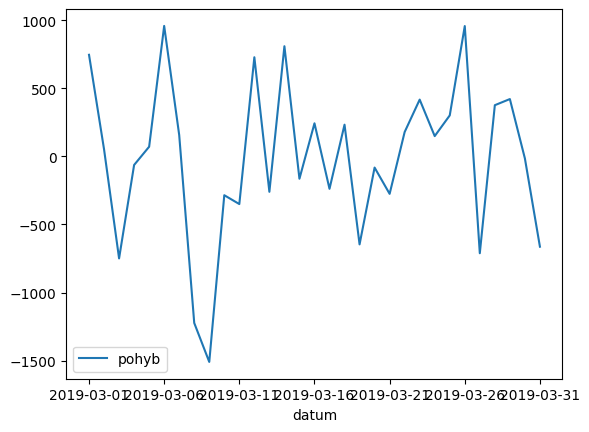

In [5]:
import pandas
import matplotlib.pyplot as plt

url = "ucet.csv"
ucet = pandas.read_csv(url, names=['datum', 'pohyb'], index_col='datum')

ucet.plot()
plt.show()

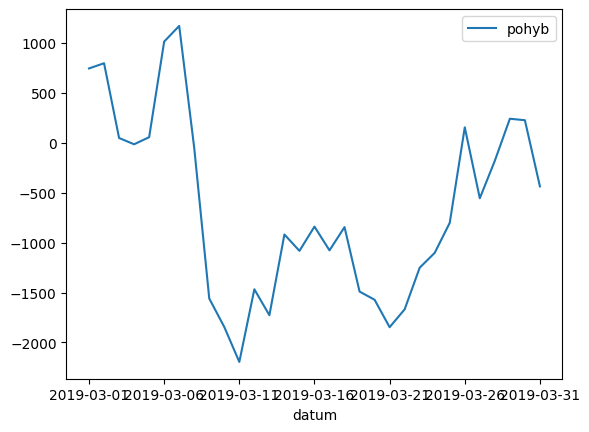

In [7]:
ucet.cumsum().plot() # kumulativní suma
plt.show()

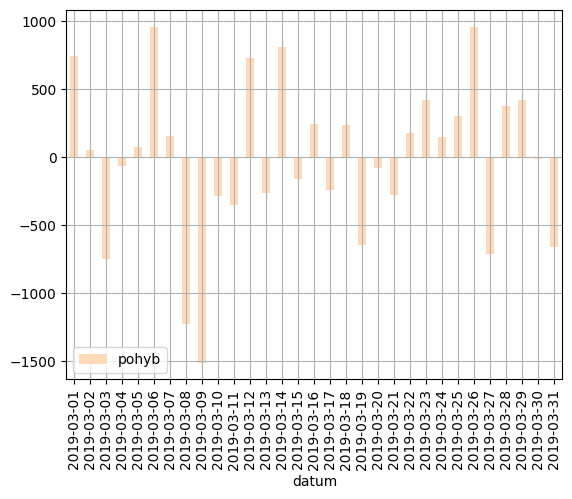

In [13]:
ucet.plot(
    kind="bar",
    color="peachpuff", #0 = černá 1 = bílá a vše mezi tím odstíny šedé
    grid=True
)
plt.show()

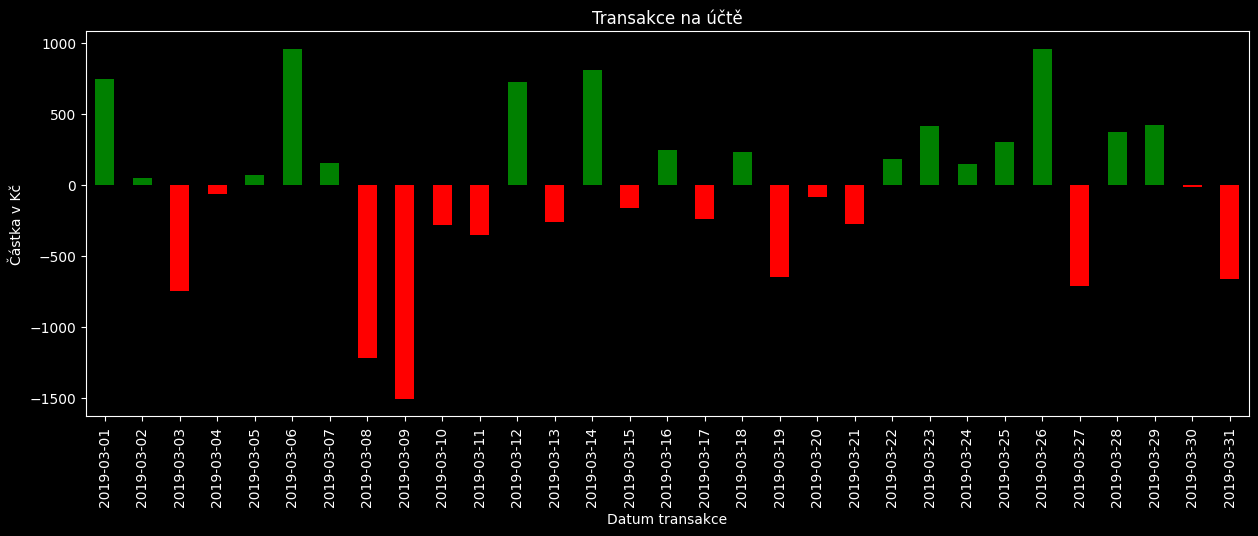

In [17]:
color = ["red" if value < 0 else "green" for value in ucet["pohyb"]]
ucet["pohyb"].plot(kind = 'bar',
        color = color, 
        width = 0.5,
        ylabel = "Částka v Kč",
        xlabel = "Datum transakce",
        title = "Transakce na účtě"
        )
plt.show()

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


<function matplotlib.pyplot.show(close=None, block=None)>

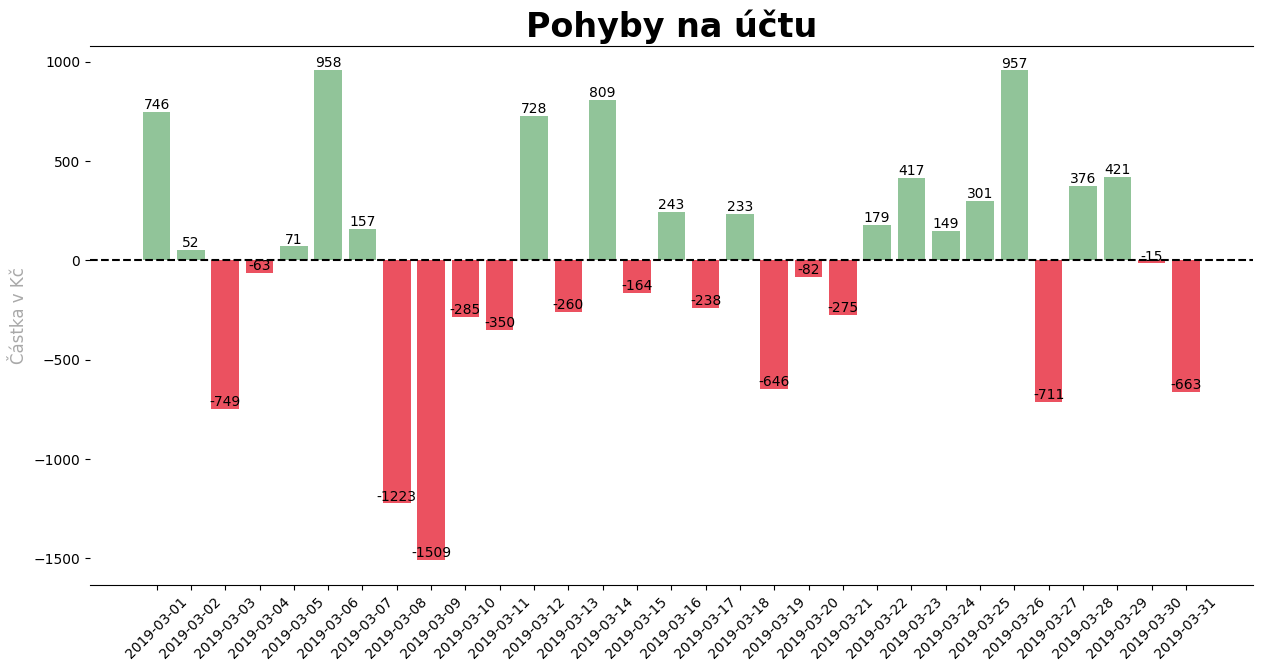

In [15]:
color = ["#EB5160" if value < 0 else "#91C499" for value in ucet["pohyb"]]

fig, ax = plt.subplots(figsize=(15,7))
print(type(fig))
print(type(ax))


ax.set_title("Pohyby na účtu", fontweight="bold", fontsize = 24)
ax.tick_params(axis="x", labelrotation=45)
ax.set_ylabel("Částka v Kč", color="darkgrey", fontsize = 12)
ax.bar(ucet.index, ucet.pohyb, color = color)
plt.axhline(y=0, color="k", linestyle="--")

## Popisky hodnot v grafu
for i in range(len(ucet.pohyb)):
    plt.annotate(str(ucet.pohyb[i]), 
                xy=(ucet.index[i],
                ucet.pohyb[i]), 
                ha='center', 
                va='bottom')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

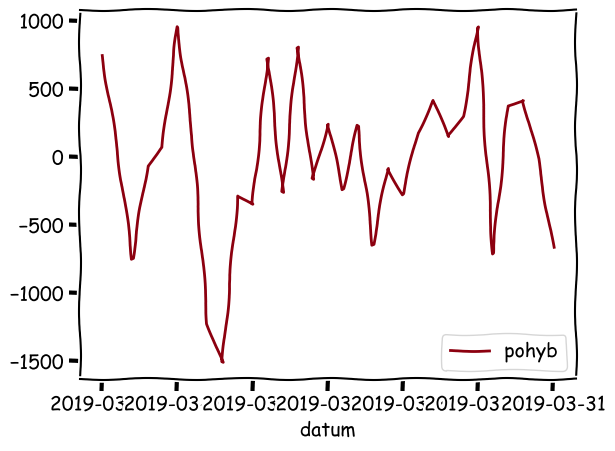

In [21]:
#https://matplotlib.org/stable/gallery/style_sheets/index.html
#https://towardsdatascience.com/how-to-create-and-use-custom-matplotlib-style-sheet-9393f498063

plt.rcParams['figure.figsize'] = [15, 5]
plt.style.use(['default']) # default, grayscale
with plt.xkcd():
    ucet.plot(
        color="xkcd:crimson"
    )
plt.show()

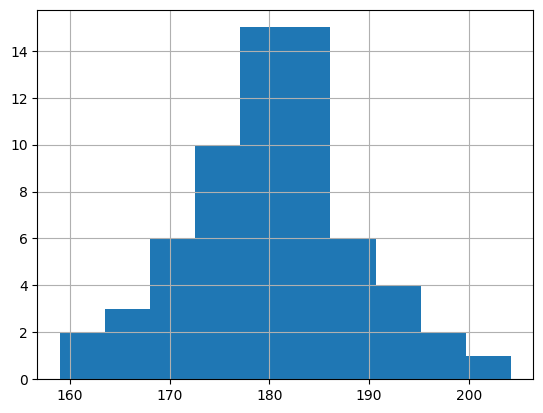

In [23]:
muzi = pandas.Series([
  179.3, 183.7, 181.4, 176.0, 183.6, 184.7, 163.4, 180.3,
  167.5, 166.8, 173.5, 172.5, 173.0, 177.6, 176.0, 179.5,
  182.6, 172.0, 183.2, 177.0, 176.2, 175.7, 174.3, 180.3,
  184.9, 171.1, 182.3, 169.7, 181.3, 188.8, 176.8, 159.0,
  180.3, 198.5, 185.8, 191.0, 170.9, 196.0, 183.3, 183.0,
  189.9, 184.8, 184.0, 183.1, 184.0, 190.7, 191.7, 187.8,
  177.5, 177.5, 189.2, 188.4, 195.0, 204.2, 180.2, 181.3,
  178.2, 182.6, 172.1, 175.7, 180.7, 181.2, 165.0, 188.6
])
muzi.hist()
plt.show()

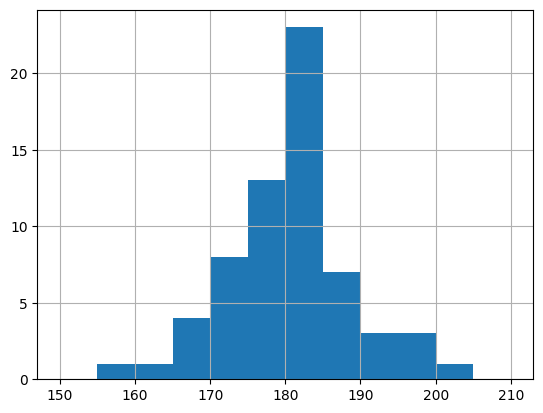

In [25]:
# Rozdělení po 5 centimetrech
muzi.hist(bins=[
  150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210
])
plt.show()

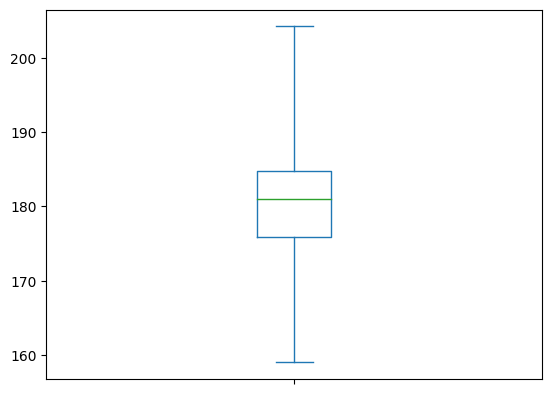

In [26]:
muzi.plot(
            kind='box', 
            whis=[0, 100] # whiskers: the vertical lines extending to the most extreme, non-outlier data points.
        )
plt.show()
# Další možnosti vytvoření grafu
# df.plot.box()
# df.boxplot()

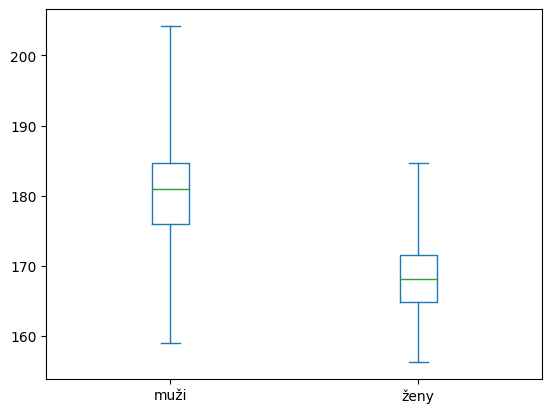

In [27]:
zeny = pandas.Series([
  172.0, 169.0, 166.8, 164.6, 172.7, 171.5, 167.0, 167.0,
  168.3, 184.7, 166.0, 160.0, 168.8, 165.8, 173.5, 163.0,
  168.9, 158.4, 166.4, 169.4, 174.2, 175.6, 167.2, 168.0,
  171.5, 168.8, 168.9, 174.1, 169.0, 170.7, 156.3, 174.8,
  169.1, 161.4, 172.5, 166.1, 171.5, 163.9, 164.5, 169.0,
  168.5, 163.3, 169.5, 167.4, 175.5, 165.0, 166.6, 158.9,
  164.5, 168.7, 161.6, 175.8, 179.0, 167.9, 161.1, 167.6,
  165.9, 165.2, 176.0, 179.4, 160.1, 163.8, 177.7, 160.4
])
vysky = muzi.to_frame(name='muži')
vysky['ženy'] = zeny
# Alternativní postup vytvoření dataframu
# vysky = pandas.DataFrame(columns = ["Muzi", "Zeny"])
# vysky["Muzi"] = muzi
# vysky["Zeny"] = zeny
vysky.plot(kind='box', whis=[0, 100])
plt.show()

Házení kostkami
Mějme dvě hrací kostky, kterými vždy hodíme najednou a zaznamenáme součet bodů. Stáhněte si textový soubor kostky.csv, který obsahuje 1000 takových nezávislých hodů.
Načtěte tato data do tabulky a zobrazte histogram hodů. Zvolte vhodné rozložení přihrádek a zodpovězte následující dotazy:

    Jaká je nejčastější hodnota, která na dvou kostkách padne?
    Je větší šance, že padne hodnota 12 než že padne hodnota 2?


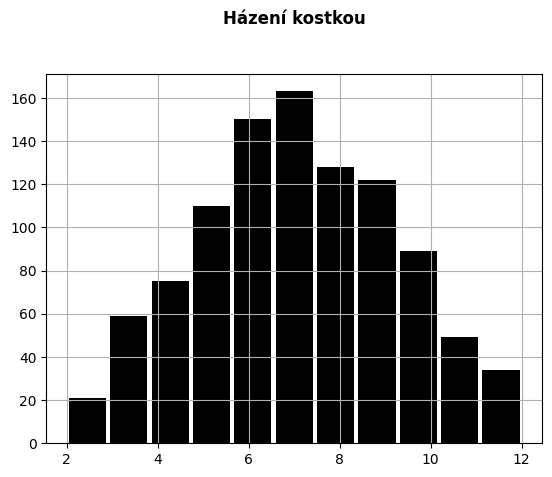

In [50]:
kostky = pandas.read_csv("kostky.csv")
kostky.hist(
            # bins=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
            bins = 11,
            range = (2,12),
            rwidth = 0.9,
            facecolor = "#000000", ## RGB
            )
plt.title("Házení kostkou\n\n",
          fontweight ="bold")
plt.show()

Call centrum
V souboru callcentrum.csv najdete několik tisíc záznamů pro call centrum, které udávají časy mezi jednotlivými příchozími hovory v minutách a vteřinách. Načtěte tato data do série v Pythonu. Časy převeďte na vteřiny a zobrazte jejich histogram a boxplot. Co lze z těchto dvou grafů vyčíst?
K převodu na vteřiny můžeš použít metodu str.split(). Pomocí ní rozdělíš hodnoty minut a vteřin do samostatných sloupců. Pomocí metody astype(int) převedeš hodnoty na čísla. Poté pomocí počítaných sloupců můžeš spočítat celkový počet vteřin.

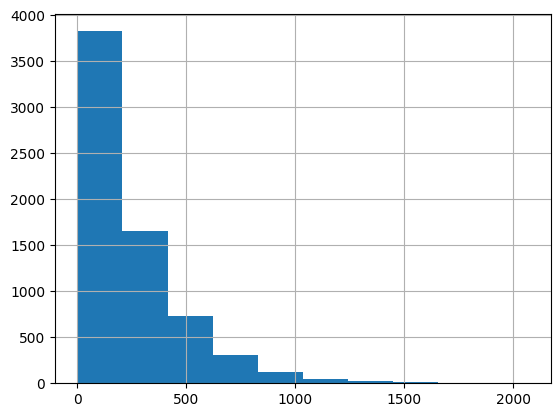

In [53]:
callcentrum = pandas.read_csv("callcentrum.csv")
callcentrum = callcentrum["hodnota"].str.split(':', expand=True).astype(int)
callcentrum["seconds"] = callcentrum[0] * 60 + callcentrum[1]
callcentrum["seconds"].hist()
plt.show()

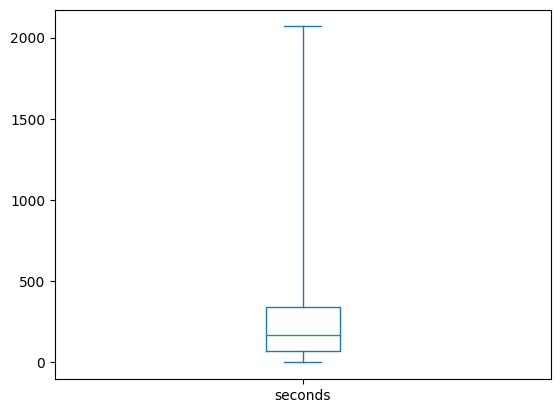

In [54]:
callcentrum["seconds"].plot(kind='box', whis=[0, 100])
plt.show()

Hurá na hory
Následující data obsahují úhrnné množství sněhu (v cm) napadlé za každý rok pro posledních 50 let pro dva lyžarské resorty. První sloupec je rok, druhý jsou data pro resort Hora šílenství, třetí jsou data pro resort Prašné údolí.
Použijte krabicový graf k porovnání sněhových srážek v obou resortech. Do kterého byste se vypravili příští rok na lyže a proč?

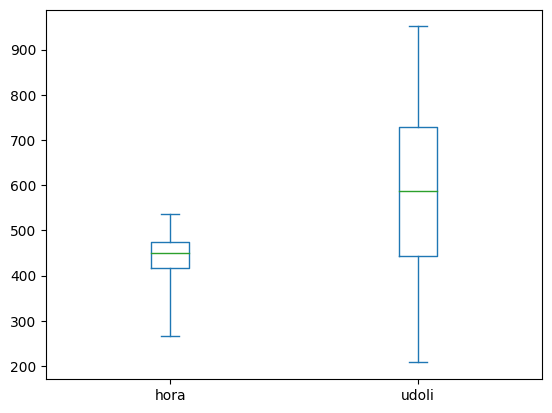

In [55]:
snih = [
    [1968, 480, 351],
    [1969, 462, 663],
    [1970, 443, 490],
    [1971, 518, 444],
    [1972, 537, 420],
    [1973, 446, 941],
    [1974, 446, 691],
    [1975, 450, 477],
    [1976, 356, 395],
    [1977, 381, 652],
    [1978, 345, 525],
    [1979, 430, 762],
    [1980, 266, 316],
    [1981, 533, 781],
    [1982, 471, 769],
    [1983, 407, 801],
    [1984, 526, 633],
    [1985, 391, 488],
    [1986, 361, 624],
    [1987, 470, 471],
    [1988, 506, 514],
    [1989, 333, 208],
    [1990, 462, 909],
    [1991, 438, 443],
    [1992, 364, 488],
    [1993, 452, 579],
    [1994, 484, 519],
    [1995, 460, 809],
    [1996, 465, 682],
    [1997, 431, 814],
    [1998, 463, 595],
    [1999, 460, 512],
    [2000, 503, 750],
    [2001, 462, 951],
    [2002, 429, 413],
    [2003, 405, 738],
    [2004, 477, 777],
    [2005, 385, 316],
    [2006, 368, 417],
    [2007, 513, 635],
    [2008, 448, 689],
    [2009, 525, 443],
    [2010, 427, 225],
    [2011, 460, 618],
    [2012, 417, 742],
    [2013, 517, 247],
    [2014, 466, 552],
    [2015, 523, 441],
    [2016, 422, 690],
    [2017, 420, 699]
]
snihdf = pandas.DataFrame(snih, columns=['rok', 'hora', 'udoli'])
snihdf = snihdf.set_index('rok')
snihdf.plot(kind='box', whis=[0,100])
plt.show()

In [ ]:
plt.savefig('my_plot.png')